In [262]:
# Bu projemizde kullanacagımız kütüphaneleri içeri aktarıyoruz.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [214]:
# veri setimiz hakkında hızlı bir öngörü;
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**BMİ**

In [215]:
# bmi değerlerimizin, istatiksel olarak dağılımını görüyoruz.
bmi_stats = df["bmi"].describe()
print(bmi_stats)

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


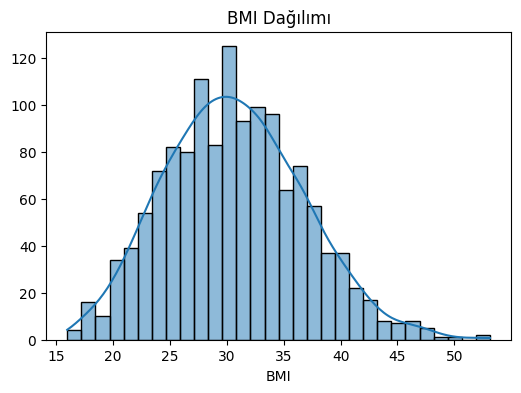

In [216]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="bmi", bins=30, kde=True)
plt.title("BMI Dağılımı")
plt.xlabel("BMI")
plt.ylabel("")
plt.show()

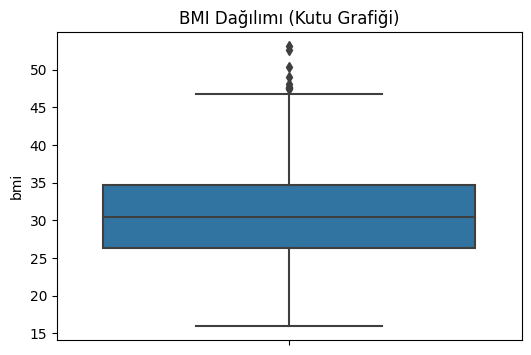

In [217]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y="bmi")
plt.title("BMI Dağılımı (Kutu Grafiği)")
plt.ylabel("bmi")
plt.show()

**SMOKER-CHARGES**

In [218]:
# sigara içen ve içmeyen sayısına hızlı bakış
insurance["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

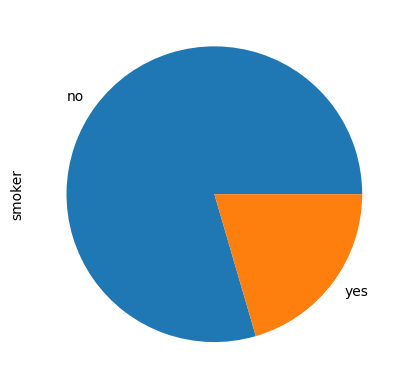

In [219]:
df['smoker'].value_counts().plot.pie();

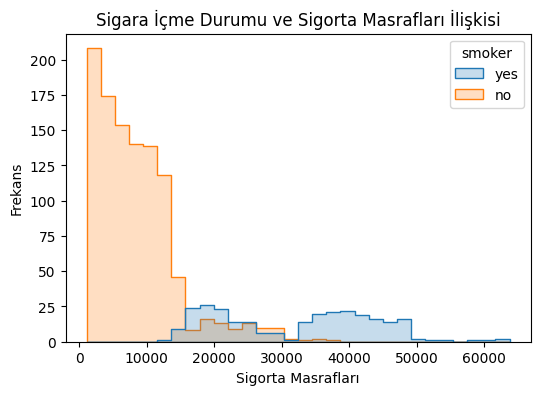

In [220]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="charges", hue="smoker", element="step", common_norm=False)
plt.title("Sigara İçme Durumu ve Sigorta Masrafları İlişkisi")
plt.xlabel("Sigorta Masrafları")
plt.ylabel("Frekans")
plt.show()


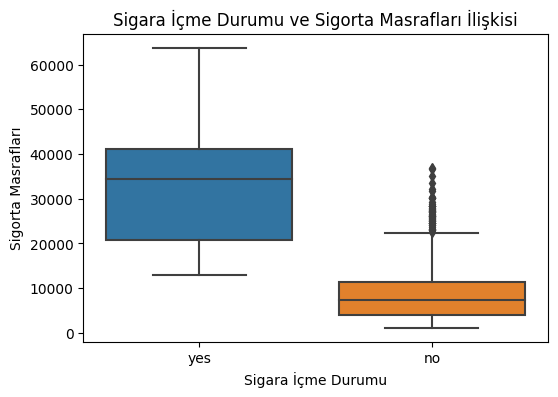

In [221]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Sigara İçme Durumu ve Sigorta Masrafları İlişkisi")
plt.xlabel("Sigara İçme Durumu")
plt.ylabel("Sigorta Masrafları")
plt.show()


**SMOKER-REGİON**

In [222]:
# bölgere nüfus dağılımı görebilecegimiz istatiksel dağılım
insurance["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

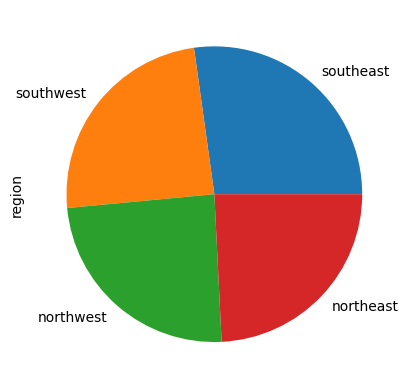

In [223]:
df['region'].value_counts().plot.pie();

In [224]:
# bölgelere ayrılmış şekilde sigara kullanan sayısı görebilecegimiz kod parcacıgı
correlation_table = pd.crosstab(df["smoker"], df["region"])
print(correlation_table)


region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


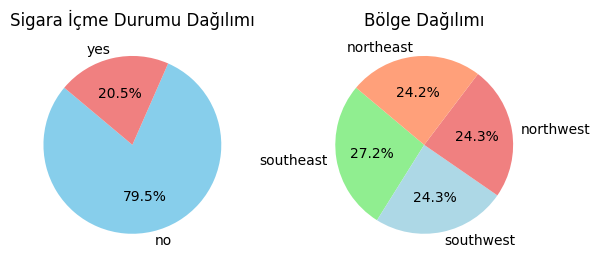

In [225]:
plt.figure(figsize=(6, 4))

# Sigara içen ve içmeyenlerin sayıları
smoker_counts = df["smoker"].value_counts()
region_counts = df["region"].value_counts()

plt.subplot(1, 2, 1)
plt.pie(smoker_counts, labels=smoker_counts.index, autopct="%1.1f%%", startangle=140, colors=["skyblue", "lightcoral"])
plt.title("Sigara İçme Durumu Dağılımı")

plt.subplot(1, 2, 2)
plt.pie(region_counts, labels=region_counts.index, autopct="%1.1f%%", startangle=140, colors=["lightgreen", "lightblue", "lightcoral", "lightsalmon"])
plt.title("Bölge Dağılımı")

plt.tight_layout()
plt.show()


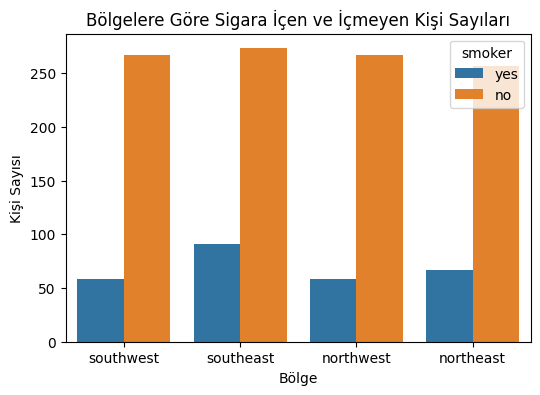

In [226]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="region", hue="smoker")
plt.title("Bölgelere Göre Sigara İçen ve İçmeyen Kişi Sayıları")
plt.xlabel("Bölge")
plt.ylabel("Kişi Sayısı")
plt.show()


**SEX-BMİ**

In [227]:
# cinsiyet dağılımını görüyoruz
insurance["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [228]:
# cinsiyete göre 'vücut kitle endeksi' ortalamaları:
bmi_mean_by_sex = df.groupby("sex")["bmi"].mean()
print(bmi_mean_by_sex)

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64


In [229]:
# 'bmi' ve 'sex' için istatiksel analiz;
bmi_stats_by_sex = df.groupby("sex")["bmi"].describe()
print(bmi_stats_by_sex)

        count       mean       std     min     25%      50%       75%    max
sex                                                                         
female  662.0  30.377749  6.046023  16.815  26.125  30.1075  34.31375  48.07
male    676.0  30.943129  6.140435  15.960  26.410  30.6875  34.99250  53.13


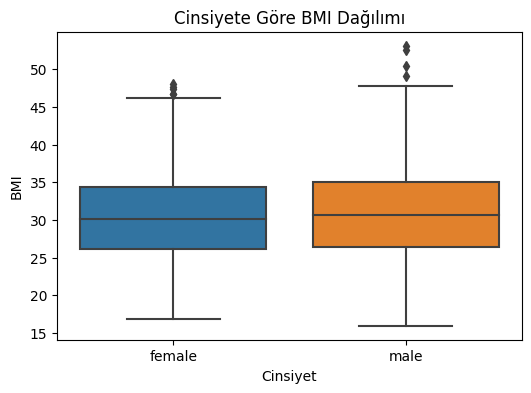

In [230]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="sex", y="bmi")
plt.title("Cinsiyete Göre BMI Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("BMI")
plt.show()


**REGİON-CHİLDREN**

In [231]:
total_persons = len(df)
total_children = df["children"].sum()

print("Toplam Kişi Sayısı:", total_persons)
print("Toplam Çocuk Sayısı:", total_children)



Toplam Kişi Sayısı: 1338
Toplam Çocuk Sayısı: 1465


In [232]:
children_by_region = df.groupby("region")["children"].sum()
print(children_by_region)
# bu kod parçacıgı bize en fazla cocuk bulunan bölgenin "southeast" oldugunu verdi.

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64


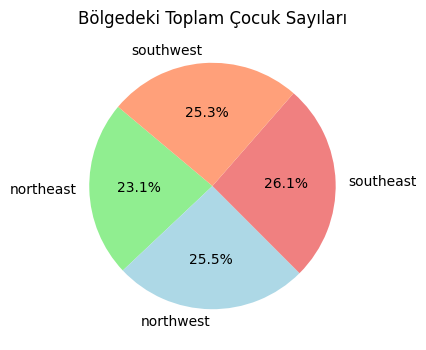

In [233]:
plt.figure(figsize=(6, 4))

# Her bir bölgedeki çocuk sayılarını hesapla
region_children = df.groupby("region")["children"].sum()

# Pasta dilimini çiz
plt.pie(region_children, labels=region_children.index, autopct="%1.1f%%", startangle=140, colors=["lightgreen", "lightblue", "lightcoral", "lightsalmon"])
plt.title("Bölgedeki Toplam Çocuk Sayıları")

plt.show()


**AGE-BMİ**

In [234]:
# yas ortalamasını veren kod parcacıgı
age_mean = df["age"].mean()
print("Yaş Ortalaması:", age_mean)

Yaş Ortalaması: 39.20702541106129


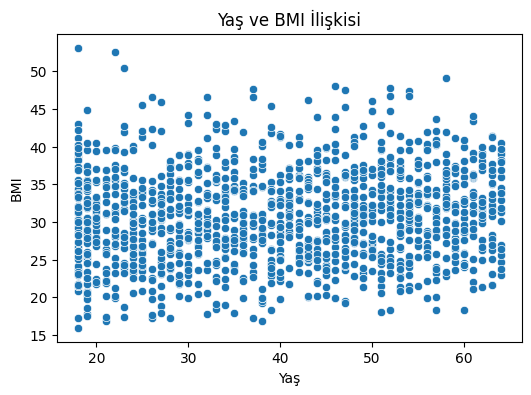

In [235]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="age", y="bmi")
plt.title("Yaş ve BMI İlişkisi")
plt.xlabel("Yaş")
plt.ylabel("BMI")
plt.show()


**BMI-CHİLDREN**

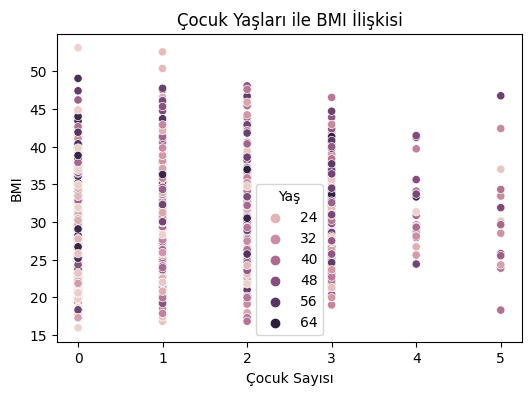

In [236]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="children", y="bmi", hue="age")
plt.title("Çocuk Yaşları ile BMI İlişkisi")
plt.xlabel("Çocuk Sayısı")
plt.ylabel("BMI")
plt.legend(title="Yaş")
plt.show()
# GÜZEL BİR VERİ OLMADI; COCUK YASLARI İSTEDİĞİM GİBİ CIKMIYOR

**OTLİER ELİMİNATİON-BMİ**

In [237]:
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["bmi"] < lower_bound) | (df["bmi"] > upper_bound)]
print("Aykırı Değerler:")
print(outliers)


Aykırı Değerler:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


**BMİ-CHARGES**

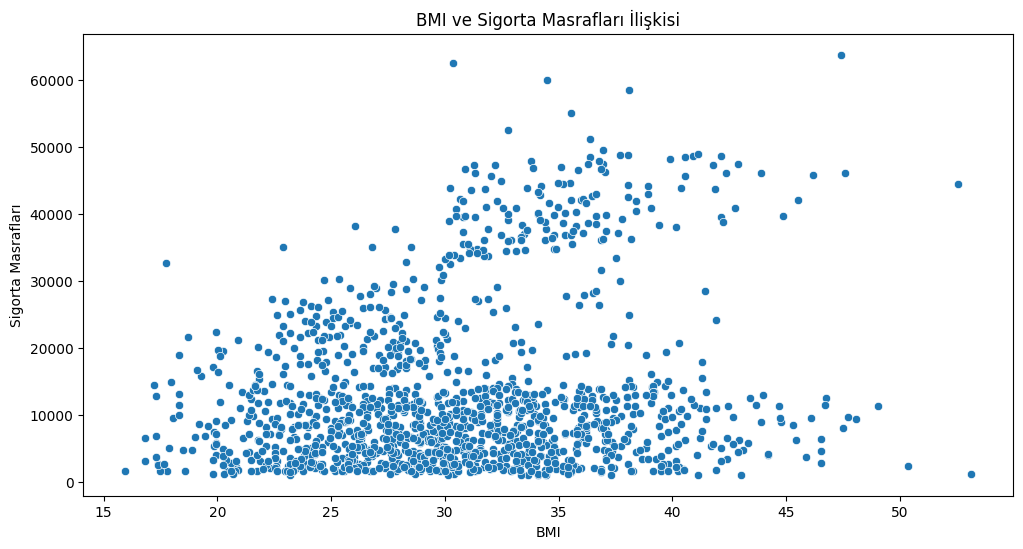

In [238]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="bmi", y="charges")
plt.title("BMI ve Sigorta Masrafları İlişkisi")
plt.xlabel("BMI")
plt.ylabel("Sigorta Masrafları")
plt.show()


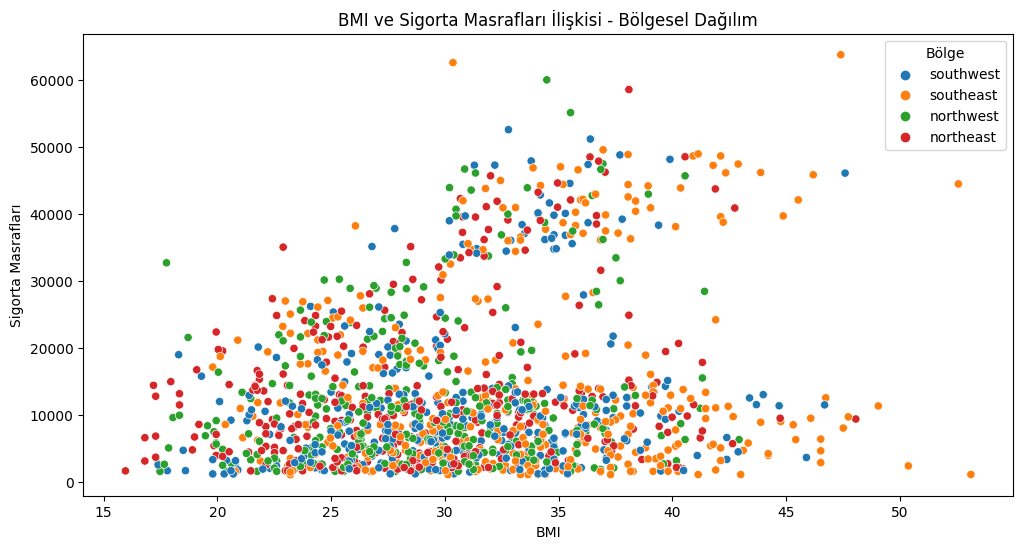

In [239]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="bmi", y="charges", hue="region")
plt.title("BMI ve Sigorta Masrafları İlişkisi - Bölgesel Dağılım")
plt.xlabel("BMI")
plt.ylabel("Sigorta Masrafları")
plt.legend(title="Bölge")
plt.show()


**REGİON-SMOKER-BMI**

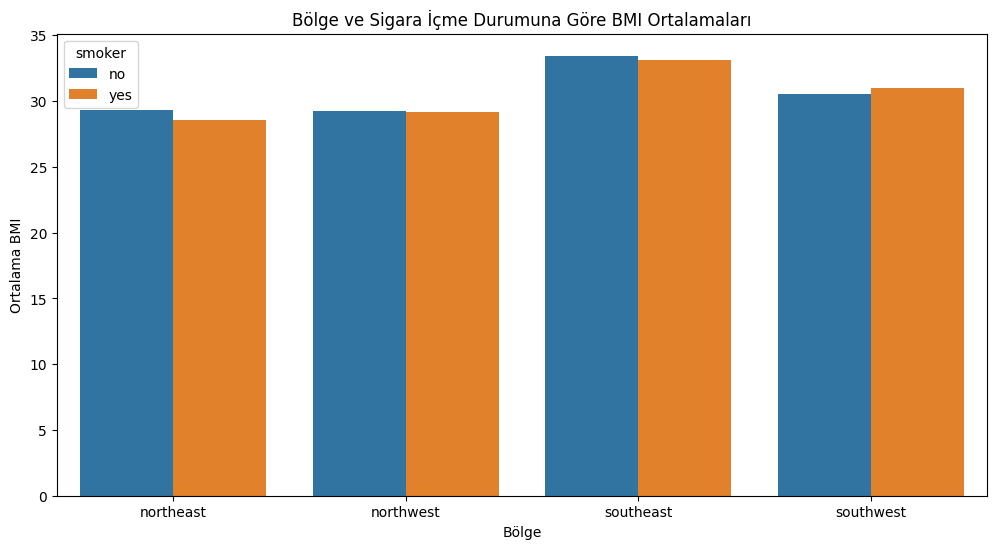

In [240]:
plt.figure(figsize=(12, 6))

# "region", "smoker" ve "bmi" özelliklerine göre gruplayarak toplam değerleri hesapla
grouped_data = df.groupby(["region", "smoker"])["bmi"].mean().reset_index()

# Çubuk grafiğini çiz
sns.barplot(data=grouped_data, x="region", y="bmi", hue="smoker")
plt.title("Bölge ve Sigara İçme Durumuna Göre BMI Ortalamaları")
plt.xlabel("Bölge")
plt.ylabel("Ortalama BMI")
plt.show()


**BÜTÜN BASLIKLAR VE KORELASYON ÜSTÜNDEN İLİŞKİLERİ**

<ipython-input-241-51ebd6f6b4be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[features].corr()


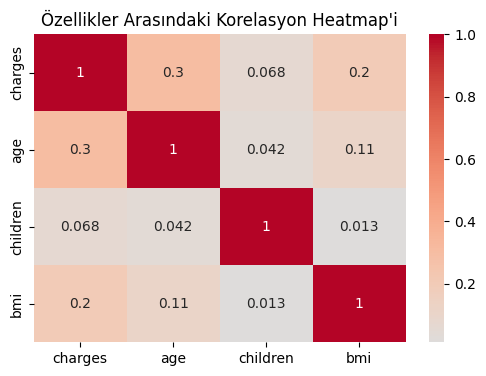

In [241]:
features = ["smoker", "region", "charges", "age", "children", "sex", "bmi"]
correlation_matrix = df[features].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Özellikler Arasındaki Korelasyon Heatmap'i")
plt.show()

In [242]:
y = df['sex']
x = df.drop(['sex'], axis=1)


In [243]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_gender = label_encoder.fit_transform(y)
y = encoded_gender
print(y)

[0 1 1 ... 0 0 0]


In [244]:
encoded_smoker = label_encoder.fit_transform(x['smoker'])
x['smoker'] = encoded_smoker

encoded_region = label_encoder.fit_transform(x['region'])
x['region'] = encoded_region


x

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,3,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,1,21984.47061
4,32,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...
1333,50,30.970,3,0,1,10600.54830
1334,18,31.920,0,0,0,2205.98080
1335,18,36.850,0,0,2,1629.83350
1336,21,25.800,0,0,3,2007.94500


In [245]:
y

array([0, 1, 1, ..., 0, 0, 0])

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [247]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled, X_test_scaled)

[[0.         0.10734463]
 [0.         0.22491256]
 [0.         0.23944041]
 ...
 [0.         0.24791499]
 [0.         0.85122411]
 [0.         0.37503363]] [[0.         0.24791499]
 [0.         0.37826204]
 [0.         0.29391983]
 [0.         0.26324993]
 [0.         0.42937853]
 [0.         0.72477805]
 [0.         0.1763519 ]
 [0.         0.59039548]
 [0.         0.03578154]
 [0.         0.3424805 ]
 [0.         0.22706484]
 [0.         0.39359699]
 [0.         0.36669357]
 [0.         0.70998117]
 [0.         0.67150928]
 [0.         0.61824052]
 [0.         0.7188593 ]
 [0.         0.55609362]
 [0.         0.32526231]
 [0.         0.29391983]
 [0.         0.21361313]
 [0.         0.44767285]
 [0.         0.38848534]
 [0.         0.64151197]
 [0.         0.32714555]
 [0.         0.44982513]
 [0.         0.5149314 ]
 [0.         0.38848534]
 [0.         0.28625235]
 [0.         0.38149045]
 [0.         0.35889158]
 [0.         0.42682271]
 [0.         0.50874361]
 [0.         0.1073

In [248]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [249]:
model.intercept_

array([-0.05175589])

In [250]:
model.coef_

array([[-0.05166865,  0.00497963]])

In [251]:
x_test[:3]

,age,sex,children,smoker,region,charges
1293,46,male,3,no,northwest,9301.89355
790,39,female,0,no,southeast,5662.22500
897,19,male,1,no,northwest,2221.56445


In [252]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [253]:
y_pred[:3]

array([1, 1, 1])

In [254]:
confusion = confusion_matrix(y_test, y_pred)

confusion_df = pd.DataFrame(confusion,
                             columns=['Predicted Positive', 'Predicted Negative'],
                             index=['Actual Positive', 'Actual Negative'])

print(confusion_df)

                 Predicted Positive  Predicted Negative
Actual Positive                   8                 132
Actual Negative                   2                 126


In [255]:
accuracy_score(y_test, y_pred)

0.5

In [256]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.06      0.11       140
           1       0.49      0.98      0.65       128

    accuracy                           0.50       268
   macro avg       0.64      0.52      0.38       268
weighted avg       0.65      0.50      0.37       268



In [257]:
model.predict_proba(X_test)[0:10]


array([[0.49451578, 0.50548422],
       [0.48848601, 0.51151399],
       [0.49238735, 0.50761265],
       [0.49380628, 0.50619372],
       [0.48612222, 0.51387778],
       [0.4724774 , 0.5275226 ],
       [0.49782703, 0.50217297],
       [0.47868081, 0.52131919],
       [0.50433156, 0.49566844],
       [0.49014098, 0.50985902]])

In [258]:
y_test[0:10]

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [259]:
y_probanility = model.predict_proba(X_test)
y_probanility = y_probanility[:,1]
y_probanility[0:10]

array([0.50548422, 0.51151399, 0.50761265, 0.50619372, 0.51387778,
       0.5275226 , 0.50217297, 0.52131919, 0.49566844, 0.50985902])

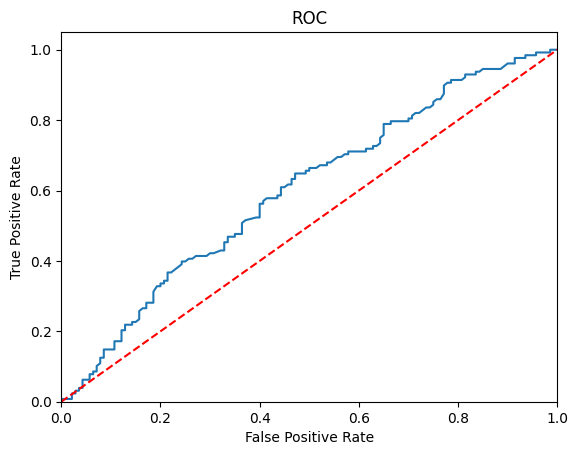

In [260]:
from sklearn.metrics import roc_auc_score, roc_curve
model_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="AUC(area =%0.2f)"%model_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show();